# scikit-learn  
Quelle: Wikipedia  
Begleitbuch DPA : Kapitel 7, Seite 361 - 395

Scikit-learn (ehemals scikits.learn) ist eine freie Software-Bibliothek zum maschinellen Lernen für die Programmiersprache Python. Es bietet verschiedene Klassifikations-, Regressions- und Clustering-Algorithmen, darunter Support-Vektor-Maschinen, Random Forest, Gradient Boosting(wie XGBoost), k-means und DBSCAN. Sie basiert als SciKit (Kurzform für SciPy Toolkit), wie beispielsweise auch Scikit-image, auf den numerischen und wissenschaftlichen Python-Bibliotheken NumPy und SciPy.

https://scikit-learn.org/stable/user_guide.html

## Gradientenabstieg

In [ ]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from random import random
from sys import argv, exit

prognose = True
prognose = False

# Daten importieren
filename = 'size-rent-4.csv'
data = []
with open(filename, 'r', newline='') as data_file:
    reader = csv.reader(data_file)
    for line in reader:
        data.append([float(value) for value in line])

# x- und y-Werte in NumPy-Array speichern.
# min_x und max_x speichern Minimum und Maximum der Originalwerte,
# damit bei der Prognose Eingabewerte skaliert werden können.
x = np.array([row[0] for row in data])
min_x = min(x)
max_x = max(x)
print(min_x, max_x)
y = np.array([row[1] for row in data])
n = len(data)

# Feature-Skalierung
x = (x - min_x) / (max_x - min_x)

# Lernrate
learning_rate = 0.2

# Beispielwerte für die grafische Darstellung
theta0s = []
theta1s = []

# Bei theta_j = 0 beginnen
theta0 = 0
theta1 = 0

# # Gradientenabstieg
# for step in range(0, 1000):
#     y_pred = theta0 + x * theta1
#     theta1_new = theta1 - learning_rate * (1 / n) * sum(x * (y_pred - y))
#     theta0_new = theta0 - learning_rate * (1 / n) * sum(y_pred - y)
#     theta0, theta1 = theta0_new, theta1_new
#     if step % 50 == 0:        # nur jeden 50sten Wert schreiben
#         theta0s.append(theta0)
#         theta1s.append(theta1)

record_step = 2
# Gradientenabstieg logarithmisch
for step in range(0, 1000):
    y_pred = theta0 + x * theta1
    theta1_new = theta1 - learning_rate * (1 / n) * sum(x * (y_pred - y))
    theta0_new = theta0 - learning_rate * (1 / n) * sum(y_pred - y)
    theta0, theta1 = theta0_new, theta1_new
    if step == record_step:
        theta0s.append(theta0)
        theta1s.append(theta1)
        record_step *= 2
### ENDE logarithmisch ###        
print(len(theta0s), theta0s)
print(f'Thetas : {theta0, theta1}')
#if len(argv) >= 3 and argv[2] == 'p':
if prognose == True:
    # Modus Vorhersage
    print("Geben Sie x-Werte für Prognosen ein; Q zum Beenden")
    while True:
        v_input = input("> ")
        if v_input == 'q' or v_input == 'Q':
            break
        try:
            value = float(v_input)
            value = (value - min_x) / (max_x - min_x)
            print(f"Prognose: {theta0 + theta1 * value} : {value}")
        except ValueError:
            print("Bitte nur Zahlen!")
else:
    # Modus Zeichnung
    plt.xlabel("Input data")
    plt.ylabel("Output data")
    plt.scatter(x, y, color='blue')
    xcoords = np.linspace(min(x), max(x), 100)
    ycoords = theta0 + theta1 * xcoords
    for i, old_theta0 in enumerate(theta0s):
        old_theta1 = theta1s[i]
        ycoords = old_theta0 + old_theta1 * xcoords
        plt.plot(xcoords, ycoords, '--', color=(i / len(theta0s), 0, 0))
    plt.plot(xcoords, ycoords, color='red')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from sys import argv, exit

# if len(argv) < 2:
#     print(f"Verwendung: python3 {argv[0]} CSV-Datei [p]")
#     exit(1)

prognose = True
prognose = False

# Daten importieren
filename = 'size-rent-4.csv'
data = []
with open(filename, 'r') as data_file:
    reader = csv.reader(data_file)
    for line in reader:
        data.append([float(value) for value in line])

# Koeffizienten der Gerade berechnen
x = np.array([row[0] for row in data])
y = np.array([row[1] for row in data])
n = len(data)
#print(n)
theta0 = (
    (sum(y) * sum(x ** 2) - sum(x) * sum(x * y)) /
    (n * sum(x ** 2) - sum(x) ** 2)
)
theta1 = (
    (n * sum(x * y) - sum(x) * sum(y)) /
    (n * sum(x ** 2) - sum(x) **2 )
)

if prognose == True:
    # Modus Vorhersage
    print(f"Gefundene Geradengleichung: y = {theta0} + {theta1}x")
    print("Geben Sie x-Werte für Prognosen ein; Q zum Beenden")
    while True:
        v_input = input("> ")
        if v_input in 'Qq':
            break
        try:
            value = float(v_input)
            print(f"Prognose: {theta0 + theta1 * value}")
        except ValueError:
            print("Bitte nur Zahlen!")
else:
    # Modus Zeichnung
    plt.title(f"y = {theta0} + {theta1}x")
    plt.xlabel("Input data")
    plt.ylabel("Output data")
    plt.scatter(x, y, color='blue')
    xcoords = np.linspace(min(x), max(x), 100)
    ycoords = theta0 + theta1 * xcoords
    plt.plot(xcoords, ycoords, color='red')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from sklearn.linear_model import LinearRegression
from sys import argv, exit

prognose = True
#prognose = False

# Daten importieren
filename = 'size-rent-4.csv'
data = []
data_file = open(filename, 'r')
reader = csv.reader(data_file)
for line in reader:
    data.append([float(line[0]), float(line[1])])
data_file.close()

# Lineare Regression
x = np.array([[row[0]] for row in data])
y = np.array([row[1] for row in data])
reg = LinearRegression().fit(x, y)
theta0 = reg.intercept_
theta1 = reg.coef_[0]

if prognose == True:
    # Modus Vorhersage
    print(f"Gefundene Geradengleichung: y = {theta0} + {theta1}x")
    print("Geben Sie x-Werte für Prognosen ein; Q zum Beenden")
    while True:
        v_input = input("> ")
        if v_input == 'q' or v_input == 'Q':
            break
        try:
            value = float(v_input)
            prediction = reg.predict(np.array([[value]]))
            print(f"Prognose: {prediction}")
        except ValueError as e:
            print(e)
else:
    # Modus Zeichnung
    plt.title(f"y = {theta0} + {theta1}x")
    plt.xlabel("Input data")
    plt.ylabel("Output data")
    plt.scatter(x, y, color='blue')
    xcoords = np.linspace(min(x), max(x), 100)
    ycoords = reg.predict(xcoords)
    plt.plot(xcoords, ycoords, color='red')
    plt.show()


# Logistische Regression


## Sigmoidfunktion


https://de.wikipedia.org/wiki/Sigmoidfunktion

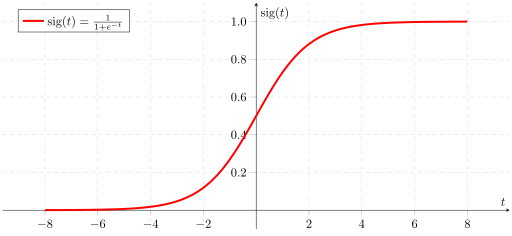

In [ ]:
# logistic-regression-gradient-descent.py
import math
import csv
import numpy as np
from random import shuffle
from sys import argv
x = 0            # 0 für <100% 
#x = 1            # 1 für 100%
if x == 1:
    filename = 'setosa-versicolor.csv'
    species0 = 'Iris-setosa'
    print('setosa (red) : versicolor (green)')
# oder
else:
    filename = 'versicolor-virginica.csv'
    species0 = 'Iris-versicolor'
    print('versicolor (green) : virginica (blue)')
# Daten einlesen
with open(filename, 'r', newline='') as data_file:
    reader = csv.reader(data_file)
    data = list(reader)

# Daten aufbereiten
shuffle(data)
#print(len(data),data)
original_x = [[float(element) for element in line[0:4]] for line in data]
#print(original_x)
# Feature-Skalierung
x = []
for i in range(0, len(original_x[0])):
    column = [row[i] for row in original_x]
    column_scaled = [(v - min(column)) / (max(column) - min(column))for v in column]
    x.append(column_scaled)
#print(x)
x = np.array(x).transpose()
#print(x, type(x))
species = [row[4] for row in data]
#print(species)
y = np.array([0.0 if s == species0 else 1.0 for s in species])
#print(y)
# Split zwischen Trainings- und Testdaten
train_x = x[0:70]
train_y = y[0:70]
test_x = x[70:]
test_y = y[70:]
#print(train_x,'\n\nTESTDATEN\n\n', test_x)
# Einzelne Vorhersage
def predict(x, theta):
    y_hat = theta[0]
    for i in range(0, len(x)):
        y_hat += theta[i + 1] * x[i]
    return 1.0 / (1.0 + math.exp(-y_hat))

# Modell trainieren
learning_rate = 0.1
theta = [0.0 for _ in range(0, len(train_x[0]) + 1)] #Leere Liste Anzahl features +1
#print(theta, type(theta))
for epoch in range(0, 1000):
    for index, x in enumerate(train_x):
#        print(index, x)
        y_hat = predict(x, theta)
        error = y[index] - y_hat
        theta[0] += learning_rate * error * y_hat * (1.0 - y_hat)
        for i in range(0, len(x)):
            theta[i + 1] += (learning_rate * error * y_hat *
                (1.0 - y_hat) * x[i]
            )
print(theta)

# Vorhersagen der Testdaten
correct = 0
for index, x in enumerate(test_x):
    y_hat = predict(x, theta)
#    print(y_hat)
    result = 1.0 if y_hat >= 0.5 else 0.0
    if result == test_y[index]:
        correct += 1
percent = correct / len(test_x) * 100.0
print(f"{correct} von {len(test_x)} ({percent:.2f}%) korrekt ermittelt.")


In [ ]:
# Zum Testen der einzelnen Parameter epoche, learning rate

import math
import csv
import numpy as np
from random import shuffle
from sys import argv
from time import time_ns

def lreg():
    # logistic-regression-gradient-descent.py
    x = 0            # 0 für <100% 
    #x = 1            # 1 für 100%
    if x == 1:
        filename = 'setosa-versicolor.csv'
        species0 = 'Iris-setosa'
        print('setosa (red) : versicolor (green)')
    # oder
    else:
        filename = 'versicolor-virginica.csv'
        species0 = 'Iris-versicolor'
        #print('versicolor (green) : virginica (blue)')
    # Daten einlesen
    with open(filename, 'r', newline='') as data_file:
        reader = csv.reader(data_file)
        data = list(reader)
    
    # Daten aufbereiten
    shuffle(data)
    #print(len(data),data)
    original_x = [[float(element) for element in line[0:4]] for line in data]
    #print(original_x)
    # Feature-Skalierung
    x = []
    for i in range(0, len(original_x[0])):
        column = [row[i] for row in original_x]
        column_scaled = [(v - min(column)) / (max(column) - min(column))for v in column]
        x.append(column_scaled)
    #print(x)
    x = np.array(x).transpose()
    #print(x, type(x))
    species = [row[4] for row in data]
    #print(species)
    y = np.array([0.0 if s == species0 else 1.0 for s in species])
    #print(y)
    # Split zwischen Trainings- und Testdaten
    train_x = x[0:70]
    train_y = y[0:70]
    test_x = x[70:]
    test_y = y[70:]
    #print(train_x,'\n\nTESTDATEN\n\n', test_x)
    # Einzelne Vorhersage
    def predict(x, theta):
        y_hat = theta[0]
        for i in range(0, len(x)):
            y_hat += theta[i + 1] * x[i]
        return 1.0 / (1.0 + math.exp(-y_hat))
    
    # Modell trainieren
    learning_rate = 0.05
    theta = [0.0 for _ in range(0, len(train_x[0]) + 1)] #Leere Liste Anzahl features +1
    #print(theta, type(theta))
    for epoch in range(0, 300):
        for index, x in enumerate(train_x):
    #        print(index, x)
            y_hat = predict(x, theta)
            error = y[index] - y_hat
            theta[0] += learning_rate * error * y_hat * (1.0 - y_hat)
            for i in range(0, len(x)):
                theta[i + 1] += (learning_rate * error * y_hat *
                    (1.0 - y_hat) * x[i]
                )
#    print(theta)
    
    # Vorhersagen der Testdaten
    correct = 0
    for index, x in enumerate(test_x):
        y_hat = predict(x, theta)
    #    print(y_hat)
        result = 1.0 if y_hat >= 0.5 else 0.0
        if result == test_y[index]:
            correct += 1
    percent = correct / len(test_x) * 100.0
#    print(f"{correct} von {len(test_x)} ({percent:.2f}%) korrekt ermittelt.")
    return percent
### M A I N ###
erg = 0
t1 = time_ns()
for i in range(0,50):
    erg += lreg()
tg = time_ns() - t1
print(f'{erg/i:.5f} % \t{tg/1e9:.2f} s')

In [ ]:
#from random import shuffle
import random as rd
l = [1,2,3,4,5,6,7,8]
rd.shuffle(l)
print(f'{l}')
#help(rd)

- 'Iris-setosa': 'red',
- 'Iris-versicolor': 'green',
- 'Iris-virginica': 'blue'
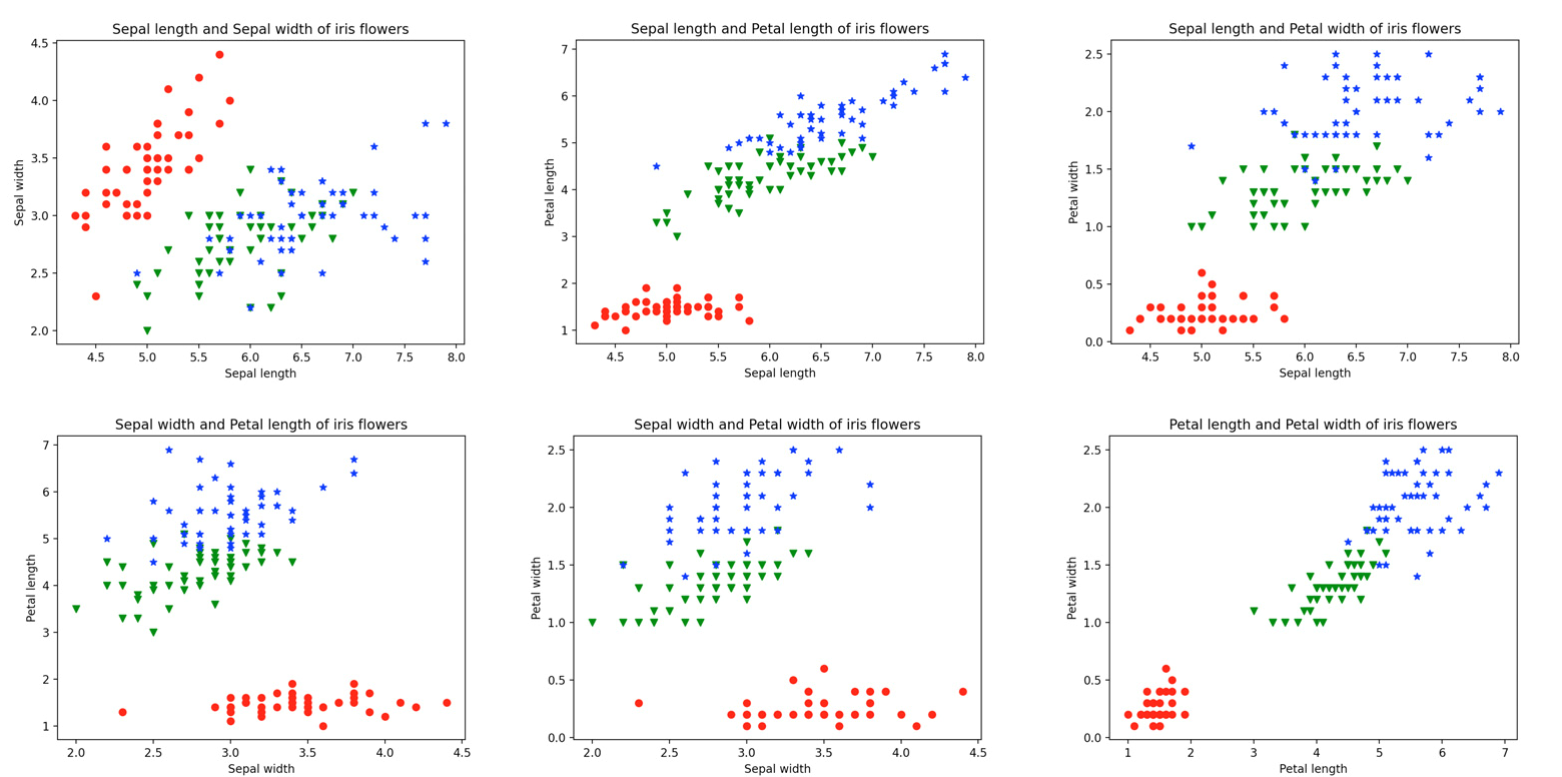

## scikit-learn für die logistische Regression verwenden

In [ ]:
# logistic-regression-sklearn.py
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Iris-Datenmenge laden
X, y = load_iris(return_X_y=True)
#print(y)
# In Trainings- und Testdaten unterteilen, dabei mischen
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33
)
print(y_test)
# Logistische Regression mit Trainingsdaten trainieren
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
# Genauigkeit der Vorhersage für die Testdaten testen
accuracy = lr.score(X_test, y_test)
print(f"Genauigkeit: {accuracy}")  
#dir(lr)

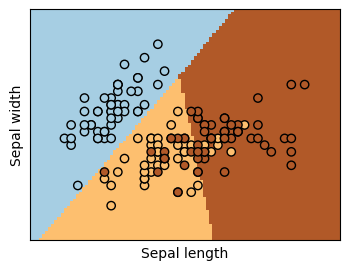

In [1]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

<img src=attachment:b708ef85-360c-4dfe-9612-f8dad22b5f4c.png width="400" />


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ValidationCurveDisplay
import numpy as np
X, y = make_classification(1000, 10, random_state=0)

_ = ValidationCurveDisplay.from_estimator(
    LogisticRegression(),
    X,
    y,
    param_name="C",
    param_range=np.geomspace(1e-5, 1e3, num=9),
    score_type="both",
    score_name="Accuracy",
)

# Entscheidungsbäume

**Formel für Gini Impurity**  

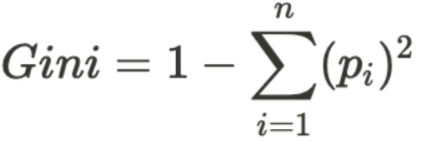  

Für n = 2 ! Bei n > 2 werden Gini Werte > 0,5.  
Für die normierte Entropie sind keine Werte > 1 möglich.


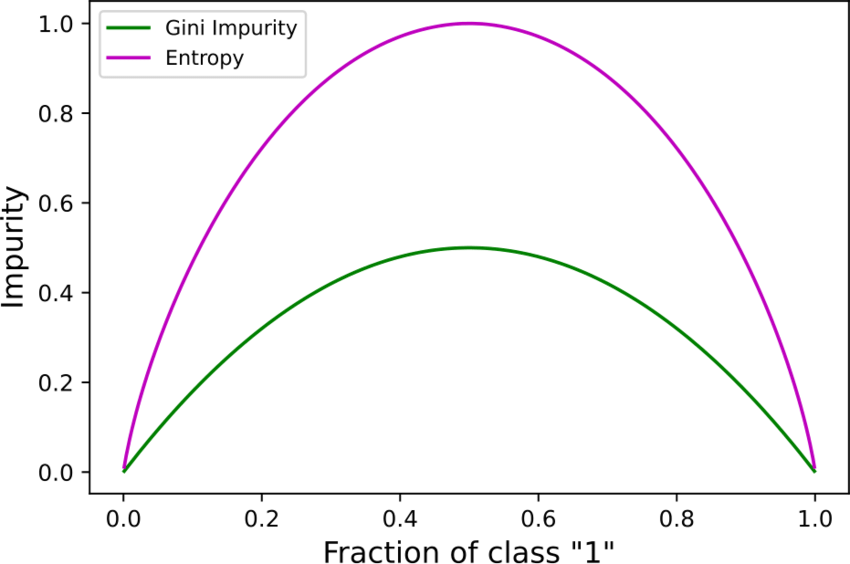



Genauigkeit: 0.96



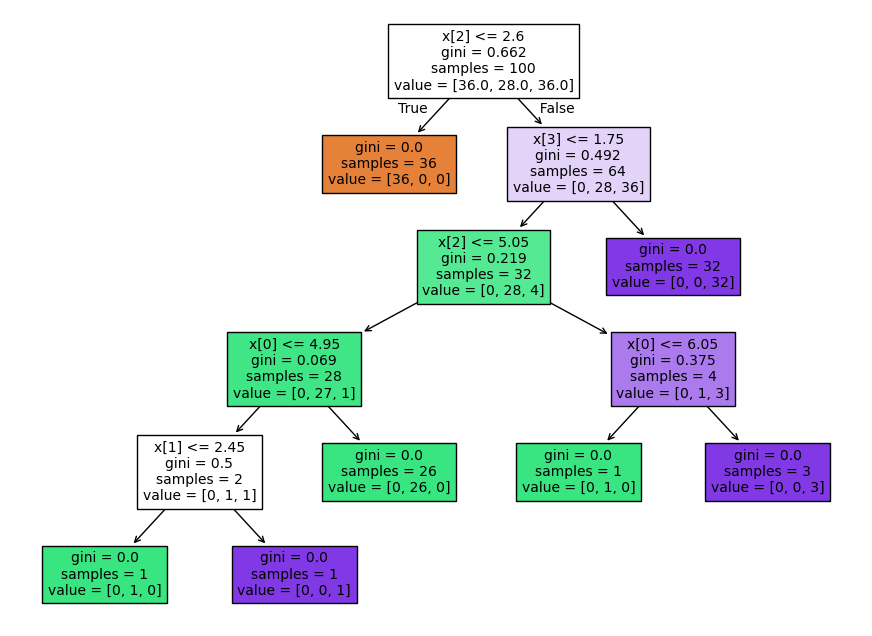

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

# Iris-Datenmenge laden
X, y = load_iris(return_X_y=True)

# In Trainings- und Testdaten unterteilen, dabei mischen
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33
)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
# Genauigkeit
accuracy = clf.score(X_test, y_test)
print(f"Genauigkeit: {accuracy}")
plt.figure(figsize=(11, 8))
tree.plot_tree(clf, filled=True, fontsize=10)
print()

# Random Forest

In [32]:
from sklearn.datasets import load_iris
from sklearn import ensemble
from sklearn.model_selection import train_test_split

# Iris-Datenmenge laden
X, y = load_iris(return_X_y=True)

# In Trainings- und Testdaten unterteilen, dabei mischen
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33
)

clf = ensemble.RandomForestClassifier()
clf = clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f"Genauigkeit: {accuracy}")

Genauigkeit: 0.94


<img src=attachment:d1c70f77-7576-4f77-925e-595e8ef183d9.png width="400" />  

Random Forest (deutsch Zufallswald) oder Random Decision Forest ist ein Verfahren, das beim maschinellen Lernen eingesetzt wird. Es handelt sich um eine Ensemblemethode, die bei Klassifikations- und Regressionsverfahren eingesetzt wird. Beim Training werden mehrere möglichst unkorrelierte Entscheidungsbäume erzeugt. Dabei wird jeder Entscheidungsbaum mit einer anderen, zufällig ausgewählten Stichprobe der Trainingsdaten trainiert. Zusätzlich berücksichtigt jeder Baum für die Aufteilung der Objekte aus seiner Stichprobe an jedem Knoten nur eine zufällig gewählte Teilmenge aller Merkmale. Anschließend werden alle Bäume zu einem Ensemble, dem Random Forest bzw. Wald (Graphentheorie), kombiniert.

Das Ergebnis des Random Forests wird mit Hilfe einer Aggregatfunktion aus den Ergebnissen aller Bäume gebildet. Bei Klassifikationsaufgaben entspricht das Ergebnis der Klasse, die die meisten Bäume gewählt haben. Bei Regressionsaufgaben wird das Ergebnis als Mittelwert der Ergebnisse aller Bäume gebildet. Der Einsatz von Random Forests korrigiert Abweichungen, die die Ergebnisse von einzelnen Entscheidungsbäumen aufgrund von Überanpassung aufweisen.

# Naive Bayes-Klassifikation

In [31]:
from sklearn.datasets import load_iris
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
# Iris-Datenmenge laden
X, y = load_iris(return_X_y=True)

# In Trainings- und Testdaten unterteilen, dabei mischen
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33
)

clf = naive_bayes.GaussianNB()
clf = clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f"Genauigkeit: {accuracy}")

Genauigkeit: 1.0


# Vergleich von Klassifizierungesmethoden

In [30]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from time import time_ns
# Iris-Datenmenge laden
X, y = load_iris(return_X_y=True)

# In Trainings- und Testdaten unterteilen, dabei mischen
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33
)

dt = tree.DecisionTreeClassifier()
rf = ensemble.RandomForestClassifier()    # Random Forest
nb = naive_bayes.GaussianNB()             # Bayes

t1 = time_ns()
dt = dt.fit(X_train, y_train)
tdt = time_ns() - t1

t2 = time_ns()
rf = rf.fit(X_train, y_train)
trf = time_ns() - t2

t3 = time_ns()
nb = nb.fit(X_train, y_train)
tnb = time_ns() - t3

print(tdt, trf, tnb)    # Zeiten Training   

t1 = time_ns()
accuracy_dt = dt.score(X_test, y_test)
t1 = time_ns() - t1
tdt = (tdt + t1) / 1e6

t2 = time_ns()
accuracy_rf = rf.score(X_test, y_test)
t2 = time_ns() - t2
trf = (trf + t2) / 1e6

t3 = time_ns()
accuracy_nb = nb.score(X_test, y_test)
t3 = time_ns() - t3
tnb = (tnb + t3) / 1e6

print(t1, t2, t3)   # Zeiten Score berechnen

print(f"Genauigkeit Entscheidungsbaum: {accuracy_dt} Zeit: {tdt:.2f} ms")
print(f"Genauigkeit Random Forest    : {accuracy_rf} Zeit: {trf:.2f} ms")
print(f"Genauigkeit Bayes            : {accuracy_nb} Zeit: {tnb:.2f} ms")

676000 56088000 398000
307000 2016000 226000
Genauigkeit Entscheidungsbaum: 0.94 Zeit: 0.98 ms
Genauigkeit Random Forest    : 0.98 Zeit: 58.10 ms
Genauigkeit Bayes            : 0.96 Zeit: 0.62 ms


# k-Means-Clustering  

Das k-Means-Clustering gehört zu den bekanntesten Clustering-Algorithmen. Der Name steht dafür, dass Daten mithilfe von Mittelwert-Operationen (engl. mean) in k verschiedene Cluster (Kategorien) unterteilt werden.

In [ ]:
print(random())

## k-Means manuell

In [ ]:
import math
import csv
import numpy as np
from statistics import mean
from random import random

# Einzelner Punkt mit Originaldaten, skalierten Daten
# und optionaler Info.
class Point:

    def __init__(self, original, scaled, info = ''):
        self.original = original
        self.scaled = scaled
        self.info = info

    def __repr__(self):
        return f"{self.info} ({self.original})"


# Einzelnes Cluster
class Cluster:
    def __init__(self, dimensions):
        self.data = []
        self.centroid = [random() for _ in range(0, dimensions)]

    def add_point(self, point):
        self.data.append(point)

    def empty(self):
        self.data = []

    def __repr__(self):
        return f"({self.data})"


# Die Klasse für den k-Means-Algorithmus.
class KMeans:

    # k: Anzahl der Cluster
    # data: die zu verarbeitenden Daten
    # runs: maximale Anzahl Durchläufe (Standardwert 100)
    # with_info: letzte Spalte der Daten Info-String? (Stw. False)
    def __init__(self, k, data, runs=100, with_info=False):
        self.runs = runs
        self.clusters = []
        self.data = []
        self.dimensions = len(data[0])
        if with_info:
            self.dimensions -= 1
        for _ in range(0, k):
            self.clusters.append(Cluster(self.dimensions))
        info = []
        if with_info:
            for point in data:
                info.append(point.pop())
        scaled_data = self.scale(data)
        for i, point in enumerate(data):
            scaled_point = scaled_data[i]
            p_info = ''
            if with_info:
                p_info = info[i]
            self.data.append(Point(point, scaled_point, info=p_info))
#        self.runs = runs

    # Eine bestimmte Dimension (Spalte) aus einer Datenmenge auslesen
    def dimension(self, data, n):
        if len(data) == 0:
            return []
        if type(data[0]) is Point:
            return [row.scaled[n] for row in data]
        return [row[n] for row in data]

    # Feature-Skalierung
    def scale(self, data):
        new_data = []
        for n in range(0, self.dimensions):
            dim = np.array(self.dimension(data, n))
            dim = (dim - min(dim)) / (max(dim) - min(dim))
            new_data.append(dim)
        return np.array(new_data).transpose()
    
    # Euklidischer Abstand        
    def distance(self, point, centroid):
        sum_points = 0
        for p0, p1 in zip(point.scaled, centroid):
            sum_points += (p0 - p1) ** 2
        return math.sqrt(sum_points)

    # Einen Punkt ins jeweils passendste Cluster einsortieren
    def cluster(self, point):
        distances = []
        for cluster in self.clusters:
            distances.append(self.distance(point, cluster.centroid))
        self.clusters[distances.index(min(distances))].add_point(point)

    # Den Algorithmus ausführen
    def run(self):
        for i in range(0, self.runs):
            # Cluster leeren
            for cluster in self.clusters:
                cluster.empty()
                #print(cluster)
            # Zuordnung zu den Clustern
            for point in self.data:
                self.cluster(point)
            converged = True
            # Zentroide verschieben
            for cluster in self.clusters:
                old_centroid = cluster.centroid[:]
#                print(old_centroid)                          # Anzeige alter Zentroid (in Verbindung mit neuer Zentroid)
                new_centroid = []
                for n in range(0, self.dimensions):      
                    dim = self.dimension(cluster.data, n)
                    if len(dim) == 0:
                        continue
                    new_centroid.append(mean(dim))
                if old_centroid != new_centroid:
                    converged = False
                    cluster.centroid = new_centroid
#                print(new_centroid, '\n')                    # Anzeige neuer Zentroid
            # Bei Konvergenz beenden
            if converged:
                print(f"Konvergenz nach {i} Durchläufen.")
                return


# Hauptprogramm: k-Means mit den Irisdaten testen
if __name__ == '__main__':
    irises = []
    with open('iris.csv', 'r') as iris_file:
        for line in csv.reader(iris_file):
            irises.append([float(line[0]), float(line[1]), float(line[2]), float(line[3]), line[4]])
    kmeans = KMeans(3, irises, with_info=True)
    # print(kmeans.clusters)
    # #print(kmeans.data)
    # print(kmeans.dimensions)
    # print(kmeans.runs)
    kmeans.run()
    for cluster in kmeans.clusters:
        cluster_info = {}
#        print(cluster, '\n\n')
        for point in cluster.data:
#            print(type(point),point.info, point.original, point.scaled)
            if point.info not in cluster_info:
                cluster_info[point.info] = 0
            cluster_info[point.info] += 1
        print(f'{str(cluster_info):50}Erg. unüberwachtes Lernen: {sum(cluster_info.values()):>8}')


## scikit-learn für k-Means

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np

X, y = load_iris(return_X_y=True)
km = KMeans(n_clusters = 5)
km.fit(X)
print(km.labels_)
groups = np.array(km.labels_).reshape(3, 50)
#print(groups)
for group in groups:
    print(np.unique(group, return_counts=True))
x = np.unique(km.labels_, return_counts=True)
for i,j in zip(x[0],x[1]):
    print(f'Cluster {i+1}: {j} Werte')
